In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC




In [9]:

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.shape

(1025, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:

df.duplicated().sum()


np.int64(723)

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df['target'].value_counts()

,count
target,
1,526
0,499


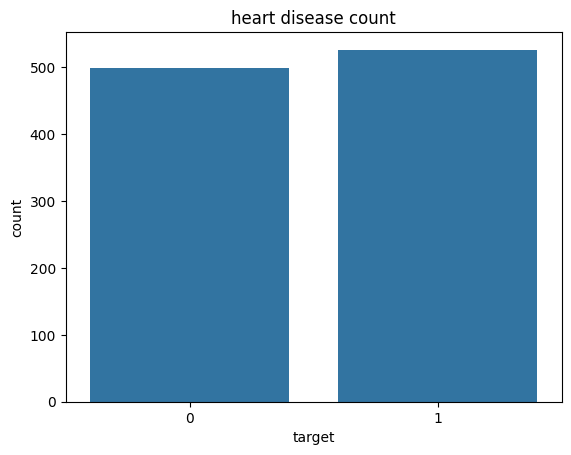

In [16]:
sns.countplot(x='target',data=df)
plt.title('heart disease count')
plt.show()

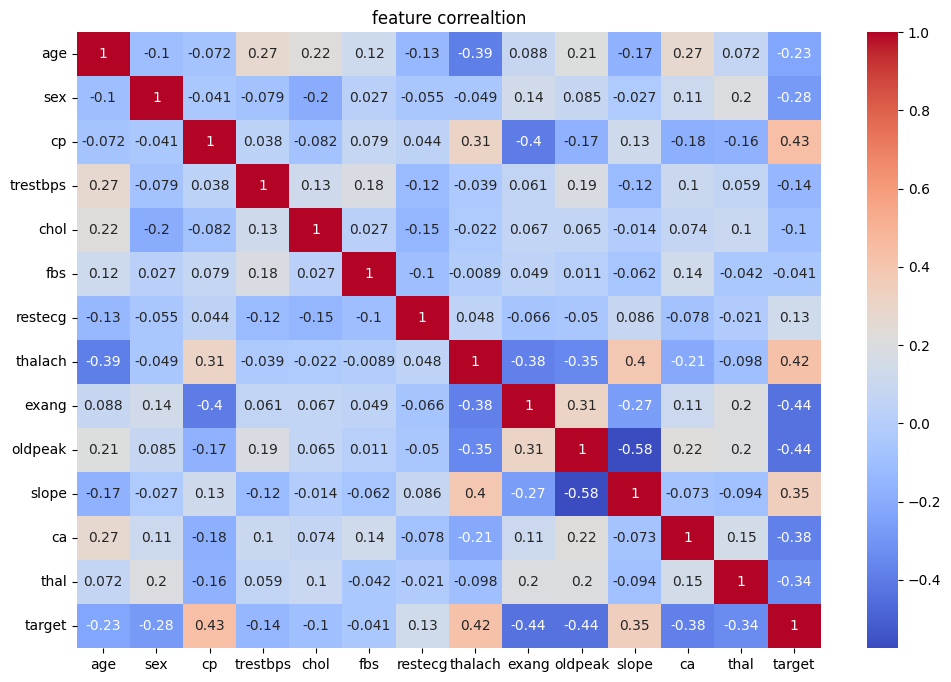

In [17]:
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot = True,cmap='coolwarm')
plt.title('feature correaltion')
plt.show()

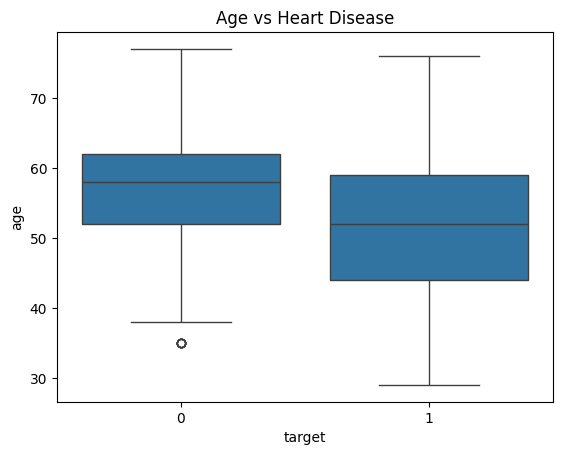

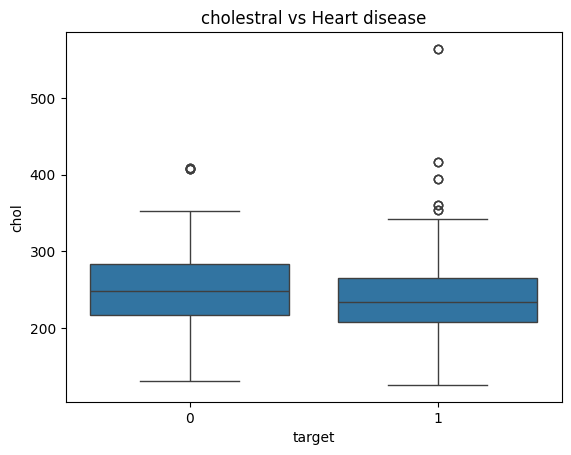

In [18]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

sns.boxplot(x='target',y='chol', data=df)
plt.title('cholestral vs Heart disease')
plt.show()

In [19]:
x = df.drop('target', axis = 1)
y =df['target']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((820, 13), (205, 13))

In [21]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [22]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(x_train_scale,y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred_lr  = lr_model.predict(x_test_scale)


In [24]:
lr_accuracy = accuracy_score(y_test,y_pred_lr)
lr_precision = precision_score(y_test,y_pred_lr)
lr_recall = recall_score(y_test,y_pred_lr)
lr_f1 = f1_score(y_test,y_pred_lr)


print('Accuracy',lr_accuracy)
print('precision',lr_precision)
print('recall',lr_recall)
print('f1',lr_f1)

Accuracy 0.7951219512195122
precision 0.7563025210084033
recall 0.8737864077669902
f1 0.8108108108108109


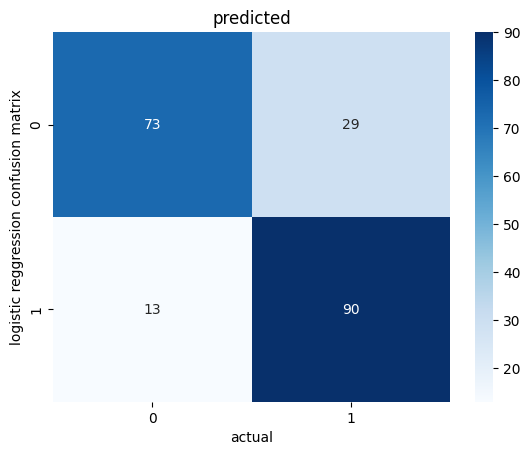

In [25]:
cm_lr = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm_lr, annot = True, fmt = 'd' , cmap = 'Blues')
plt.title('predicted')
plt.xlabel('actual')
plt.ylabel('logistic reggression confusion matrix')
plt.show()

In [26]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scale,y_train)


KNeighborsClassifier()

In [27]:
y_pred_knn = knn_model.predict(x_test_scale)


In [28]:
knn_accuracy = accuracy_score(y_test,y_pred_knn)
knn_precision = precision_score(y_test,y_pred_knn)
knn_recall = recall_score(y_test,y_pred_knn)
knn_f1 = f1_score(y_test,y_pred_knn)

print('Accuracy',knn_accuracy)
print('precision',knn_precision)
print('recall',knn_recall)
print('f1',knn_f1)

Accuracy 0.8341463414634146
precision 0.8
recall 0.8932038834951457
f1 0.8440366972477065


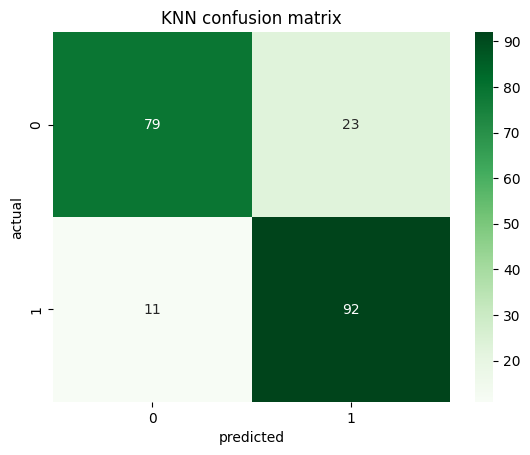

In [29]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm_knn,annot=True,fmt= 'd',cmap  = 'Greens')
plt.title('KNN confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [30]:
#decesion tree

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred_dt = model_dt.predict(x_test)

In [32]:
dt_accuracy = accuracy_score(y_test,y_pred_dt)
dt_precision = precision_score(y_test,y_pred_dt)
dt_recall = recall_score(y_test,y_pred_dt)
dt_f1 = f1_score(y_test,y_pred_dt)

print('Accuracy',dt_accuracy)
print('precision',dt_precision)
print('recall',dt_recall)
print('f1',dt_f1)

Accuracy 0.9853658536585366
precision 1.0
recall 0.970873786407767
f1 0.9852216748768473


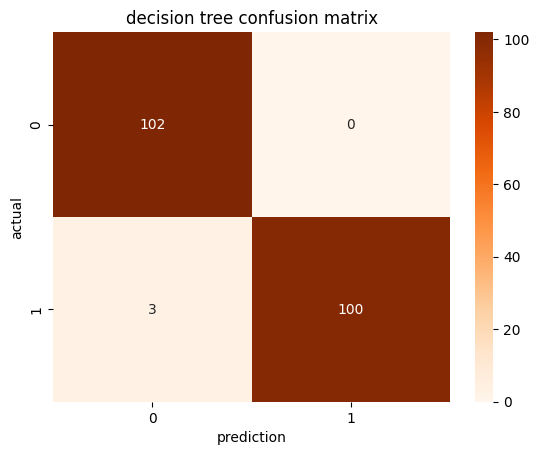

In [33]:
cm_dt = confusion_matrix(y_test,y_pred_dt)

sns.heatmap(cm_dt , annot = True , fmt = 'd' ,cmap = 'Oranges')
plt.title('decision tree confusion matrix')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [34]:
#random forest

model_rf = RandomForestClassifier(n_estimators = 100 , random_state=42)
model_rf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [35]:
y_pred_rf = model_rf.predict(x_test)

In [36]:
rf_accuracy = accuracy_score(y_test,y_pred_rf)
rf_precision = precision_score(y_test,y_pred_rf)
rf_recall = recall_score(y_test,y_pred_rf)
rf_f1 = f1_score(y_test,y_pred_rf)

print('Accuracy',rf_accuracy)
print('precision',rf_precision)
print('recall',rf_recall)
print('f1',rf_f1)

Accuracy 0.9853658536585366
precision 1.0
recall 0.970873786407767
f1 0.9852216748768473


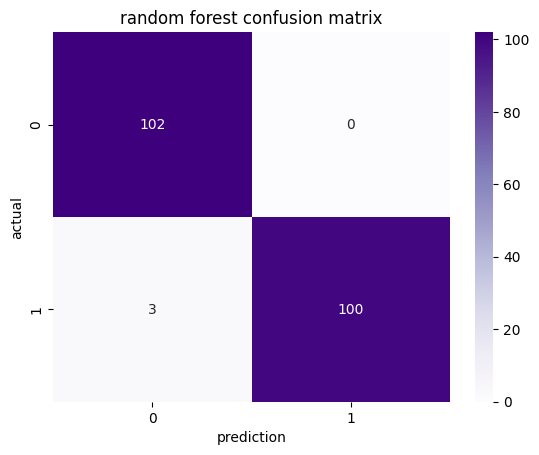

In [37]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

sns.heatmap(cm_rf , annot = True , fmt = 'd' ,cmap = 'Purples')
plt.title('random forest confusion matrix')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [38]:
#svm

model_svm = SVC(kernel = 'linear', random_state = 42)
model_svm.fit(x_train_scale,y_train)


SVC(kernel='linear', random_state=42)

In [39]:
y_pred_svm = model_svm.predict(x_test_scale)

In [40]:
svm_accuracy = accuracy_score(y_test,y_pred_svm)
svm_precision = precision_score(y_test,y_pred_svm)
svm_recall = recall_score(y_test,y_pred_svm)
svm_f1 = f1_score(y_test,y_pred_svm)

print('Accuracy',svm_accuracy)
print('precision',svm_precision)
print('recall',svm_recall)
print('f1',svm_f1)

Accuracy 0.8146341463414634
precision 0.76
recall 0.9223300970873787
f1 0.8333333333333334


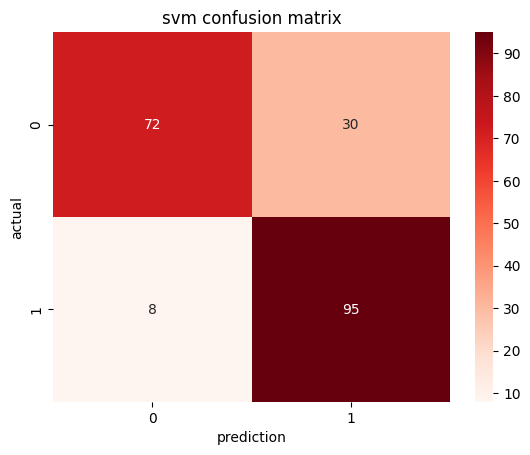

In [41]:
cm_svm = confusion_matrix(y_test,y_pred_svm)

sns.heatmap(cm_svm , annot = True , fmt = 'd' ,cmap = 'Reds')
plt.title('svm confusion matrix')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [42]:
import pandas as pd

model_result = pd.DataFrame({ 'Model' : ['logistic Regression',
                                         'KNN',
                                         'Decision tree',
                                         'Random forest',
                                         'SVM'],
                              'Accuracy' : [
                                  lr_accuracy,
                                  knn_accuracy,
                                  dt_accuracy,
                                  rf_accuracy,
                                  svm_accuracy],
                              'precision' : [
                                          lr_precision,
                                          knn_precision,
                                          dt_precision,
                                          rf_precision,
                                          svm_precision],
                              'recall' : [
                                          lr_recall,
                                          knn_recall,
                                          dt_recall,
                                          rf_recall,
                                          svm_recall],
                              'f1' : [
                                          lr_f1,
                                          knn_f1,
                                          dt_f1,
                                          rf_f1,
                                          svm_f1
                              ]
                              })

print(model_result)

                 Model  Accuracy  precision    recall        f1
0  logistic Regression  0.795122   0.756303  0.873786  0.810811
1                  KNN  0.834146   0.800000  0.893204  0.844037
2        Decision tree  0.985366   1.000000  0.970874  0.985222
3        Random forest  0.985366   1.000000  0.970874  0.985222
4                  SVM  0.814634   0.760000  0.922330  0.833333
